# Plotting High-Resolution CMIP6 Data from an ACCESS-ESM Model

This notebook covers how to plot high-resolution climate model data from an **ACCESS-ESM** model, specifically CMIP6 data, onto the Earth’s surface.

We will walk through the following steps:

- **Downloading Data**: Downloading an example `.nc` file from Gadi that contains global temperature data.
- **Adding a Colour Scheme**: Applying a suitable colour scheme to represent the data values.
- **Plotting the Data**: Visualising the data on the surface of the Earth.

If you're running this notebook on **Gadi/NCI**, ensure that **gdata/fs38** is included in your storage environment. Otherwise, the notebook will download a ~0.5GB `.nc` file.

This process helps visualise climate model outputs from the **CMIP6** project, providing an intuitive way to explore model predictions on global temperature changes.

## Initial Setup

In [1]:
import accessvis
import xarray as xr
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import os
accessvis.resolution_selection(default=1)

Low-res 2K - fast for testing
Mid-res 4K - good enough for full earth views
High res 8K - better if showing close up at country scale
Ultra-high 16K - max detail but requires a fast GPU with high memory


Dropdown(description='Detail:', options=(('Low-res 2K', 1), ('Mid-res 4K', 2), ('High-res 8K', 3), ('Ultra-hig…


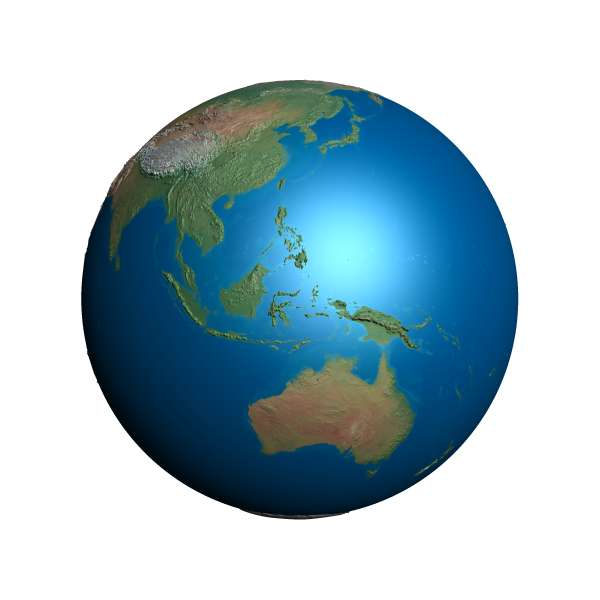

In [2]:
lv = accessvis.plot_earth(texture='relief', background="white", vertical_exaggeration=20)
lv.rotation(0.0, -125.0, 0.0) #Rotate to Australia
lv.set_properties(diffuse=0.8, ambient=0.1, specular=0.35, shininess=0.03, light=[1,1,0.98]) # make pretty
lv.brightness_contrast_saturation(0.5, 0.5, 0.65)
lv.display(resolution=(600,600))

## Downloading Data (Only applies if you are not on Gadi)

If you're not running this notebook on **Gadi**, the following code will download a **.nc** file containing historical surface temperature data from the **NCI THREDDS** server. The file is approximately **0.5GB** in size.

This dataset provides historical temperature data from the **CMIP6** project and is useful for understanding past climate trends. We will load this data into an **xarray** object for further analysis and visualisation.

Make sure you have sufficient disk space for the download. The file will be fetched directly from the server, so it may take a few minutes depending on your connection speed.

In [3]:
thredds_server = "https://thredds.nci.org.au/thredds/fileServer/fs38/publications/"
gadi_server = '/g/data/fs38/publications/'

#Temp at the surface
ver = "CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/"
fpath = "r10i1p1f1/day/tas/gn/latest/tas_day_ACCESS-ESM1-5_historical_r10i1p1f1_gn_20000101-20141231.nc"
var = 'tas'
url = f"{thredds_server}{ver}{fpath}"
gadi_path = f"{gadi_server}{ver}{fpath}"


if os.path.exists(gadi_path):
    data_file = gadi_path
else:
    print('Could not load from gadi.')
    data_file = os.path.abspath(os.path.split(url)[-1])

    if not os.path.exists(data_file):
        print(f'Downloading from {url}')
        print(f'Saving to {data_file}')
        urllib.request.urlretrieve(url, data_file)

print(f'{data_file=}')

data_file='/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/day/tas/gn/latest/tas_day_ACCESS-ESM1-5_historical_r10i1p1f1_gn_20000101-20141231.nc'


## Reading the .nc file
Loading the .nc file in xarray->numpy, and taking the last datastep.

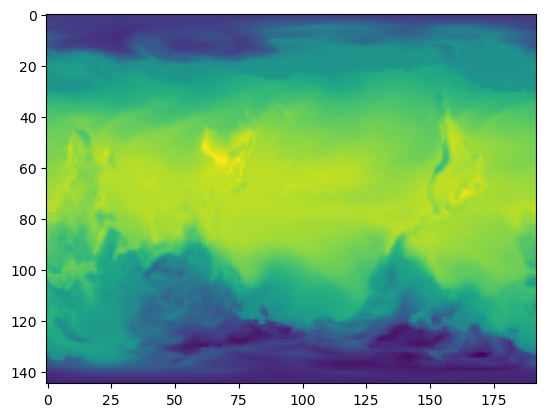

In [4]:
ds = xr.open_dataset(data_file)
data = ds[var][-1] # taking the last day's data
arr = np.array(data) # converting to numpy
plt.imshow(arr)

## Plotting
Changing the colour scheme. You can use any matplotlib compatible colour scheme.

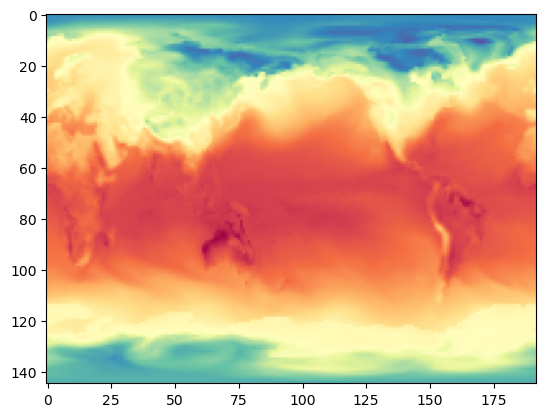

In [5]:
colours = accessvis.array_to_rgba(arr, flip=True, colourmap='Spectral_r')
plt.imshow(colours)

### Overlaying on the Earth

In this step, we overlay the temperature data onto the Earth's surface. Note that we use **dataMode=0**, which ensures that the data is plotted on both land and ocean surfaces, providing a complete view of the global temperature distribution.

For more information on how to properly overlay data onto the Earth, refer to the **previous notebook** on **overlaying an image**. It covers the process in more detail and offers insights into handling different types of data.


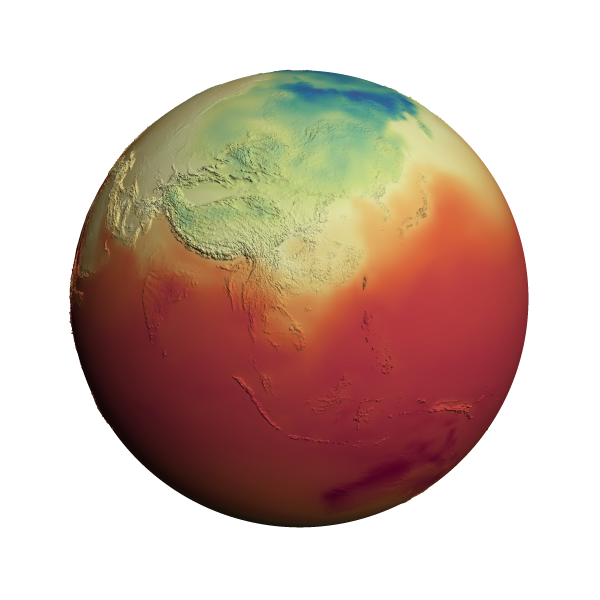

In [10]:
accessvis.update_earth_values(lv, dataMode=0, dataAlpha=1, data=colours)
lv.display(resolution=(600,600))

In [11]:
lv.window(resolution=(600,600))

## Conclusion

In this notebook, we have demonstrated how to download, process, and overlay global temperature data from an ACCESS-ESM model using CMIP6 data. By applying colour schemes and plotting the data onto the Earth's surface, we've created a visual representation of historical temperature trends.

This approach can be easily adapted to plot other variables from the **CMIP6 replicas collection** available on NCI Gadi. Whether you're working with temperature, precipitation, or other climate variables, you can load them in a similar manner using the relevant datasets.

Feel free to explore different variables to create more comprehensive visualisations, or adapt the code to suit your specific analysis needs.